In [1]:
#!pip install -r requirements.txt

In [2]:
import pandas as pd

In [3]:
import re

In [4]:
%pwd

'C:\\Users\\SUMAN CHATTERJEE\\Documents\\Social Media Analytics\\TweetScraper-master'

In [5]:
%cd C:\Users\SUMAN CHATTERJEE\Documents\Social Media Analytics\TweetScraper-master\TweetScraper

C:\Users\SUMAN CHATTERJEE\Documents\Social Media Analytics\TweetScraper-master\TweetScraper


### scrapy crawl TweetScraper -a query="(#Nirbhaya) lang:en since:2019-11-28" - Is a code that i wrote on the Anaconda Prompt

In [6]:
df=pd.read_csv("NirbhayaTwitterTweets.csv",sep=",")

### Eyeballing the data

In [7]:
df.head()

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet,user_id,has_media,medias
0,dc2727,1199940744309460993,What's your take on #RapistRahul talking abou...,/dc2727/status/1199940744309460993,1,3,0,2019-11-28 12:09:01,True,False,112198273,NaN,NaN
1,DynamiteNews_,1199944607888543744,2012 #Delhi gang-rape case: On the plea of #N...,/DynamiteNews_/status/1199944607888543744,0,0,0,2019-11-28 12:24:23,False,False,3303023034,NaN,NaN
2,devadabel,1199944839569145856,Better to shift this case to Pakistan SC. #Jus...,/devadabel/status/1199944839569145856,0,0,0,2019-11-28 12:25:18,True,False,1039504482663448578,NaN,NaN
3,PrachiyNBT,1199949588892774401,# Nirbhaya #Gangrape Case : Court has sought...,/PrachiyNBT/status/1199949588892774401,0,0,0,2019-11-28 12:44:10,False,False,3616428614,NaN,NaN
4,NBTDilli,1199950835918106624,# Nirbhaya #Gangrape : Court has sought statu...,/NBTDilli/status/1199950835918106624,1,0,0,2019-11-28 12:49:07,False,False,150220875,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8357 entries, 0 to 8356
Data columns (total 13 columns):
usernameTweet    8357 non-null object
ID               8357 non-null int64
text             8357 non-null object
url              8357 non-null object
nbr_retweet      8357 non-null int64
nbr_favorite     8357 non-null int64
nbr_reply        8357 non-null int64
datetime         8357 non-null object
is_reply         8357 non-null bool
is_retweet       8357 non-null bool
user_id          8357 non-null int64
has_media        329 non-null object
medias           329 non-null object
dtypes: bool(2), int64(5), object(6)
memory usage: 734.6+ KB


In [9]:
df.shape

(8357, 13)

In [10]:
df.columns

Index(['usernameTweet', 'ID', 'text', 'url', 'nbr_retweet', 'nbr_favorite',
       'nbr_reply', 'datetime', 'is_reply', 'is_retweet', 'user_id',
       'has_media', 'medias'],
      dtype='object')

### Below mentioned columns are removed as some of these columns have lot of null values and the ones which have non-null values doesnt give any meaningful insights for the purpose of the project

In [11]:
df=df.drop(columns=['is_reply'])
df=df.drop(columns=['is_retweet'])
df=df.drop(columns=['user_id'])
df=df.drop(columns=['has_media'])
df=df.drop(columns=['medias'])

In [12]:
df=df.drop(columns=['url'])

In [13]:
df.tail()

,usernameTweet,ID,text,nbr_retweet,nbr_favorite,nbr_reply,datetime
8352,DeepCdeepak,1201611979934359552,"Yes,public is no one to punish and we don’t wa...",0,0,0,2019-12-03 02:49:55
8353,SahbBabbar,1201616524458385408,Waiting for @ArvindKejriwal to offer either g...,0,0,0,2019-12-03 03:07:59
8354,SMHoosayn,1201631839472902145,Let Sanghis & @BJP support or denounce rapists...,1,0,0,2019-12-03 04:08:50
8355,pachpanTaaray,1201640405147639808,The said MP has been in Parliament since 2004....,0,0,0,2019-12-03 04:42:52
8356,jobinindia,1201645901082705923,@ BJP4India gas highest number of MPs and MLA...,0,0,0,2019-12-03 05:04:42


In [14]:
df['nbr_reply'].value_counts()

0       6954
1        988
2        178
3         60
4         34
6         20
11        10
7         10
5         10
16         8
17         7
12         7
8          7
13         5
9          5
10         5
15         4
14         3
31         2
20         2
18         2
21         2
19         2
25         2
66         1
34         1
82         1
561        1
170        1
265        1
121        1
41         1
80         1
154        1
103        1
258        1
397        1
23         1
5676       1
166        1
78         1
46         1
30         1
22         1
69         1
35         1
61         1
45         1
29         1
251        1
147        1
39         1
51         1
91         1
Name: nbr_reply, dtype: int64

#### Timeline: 28th Nov, 2019- 2nd Dec, 2019


#### Number of Tweets Present:

In [15]:
len(df['text'])

8357

In [16]:
df.isnull().sum()

usernameTweet    0
ID               0
text             0
nbr_retweet      0
nbr_favorite     0
nbr_reply        0
datetime         0
dtype: int64

### ID - column is also not required

In [17]:
df=df.drop(columns=['ID'])

In [18]:
df.head()

,usernameTweet,text,nbr_retweet,nbr_favorite,nbr_reply,datetime
0,dc2727,What's your take on #RapistRahul talking abou...,1,3,0,2019-11-28 12:09:01
1,DynamiteNews_,2012 #Delhi gang-rape case: On the plea of #N...,0,0,0,2019-11-28 12:24:23
2,devadabel,Better to shift this case to Pakistan SC. #Jus...,0,0,0,2019-11-28 12:25:18
3,PrachiyNBT,# Nirbhaya #Gangrape Case : Court has sought...,0,0,0,2019-11-28 12:44:10
4,NBTDilli,# Nirbhaya #Gangrape : Court has sought statu...,1,0,0,2019-11-28 12:49:07


In [19]:
df=df.drop(columns=['usernameTweet'])

In [20]:
df.head()

,text,nbr_retweet,nbr_favorite,nbr_reply,datetime
0,What's your take on #RapistRahul talking abou...,1,3,0,2019-11-28 12:09:01
1,2012 #Delhi gang-rape case: On the plea of #N...,0,0,0,2019-11-28 12:24:23
2,Better to shift this case to Pakistan SC. #Jus...,0,0,0,2019-11-28 12:25:18
3,# Nirbhaya #Gangrape Case : Court has sought...,0,0,0,2019-11-28 12:44:10
4,# Nirbhaya #Gangrape : Court has sought statu...,1,0,0,2019-11-28 12:49:07


In [21]:
df['date']=df['datetime'].apply(lambda x:x.split(" ")[0])

In [22]:
df['time']=df['datetime'].apply(lambda x:x.split(" ")[1])

### The date and the time part of the datetime column is created in separate column

In [23]:
df['time']=df['time'].apply(lambda x:float(x.split(":")[0]))

In [24]:
df

,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,date,time
0,What's your take on #RapistRahul talking abou...,1,3,0,2019-11-28 12:09:01,2019-11-28,12.0
1,2012 #Delhi gang-rape case: On the plea of #N...,0,0,0,2019-11-28 12:24:23,2019-11-28,12.0
2,Better to shift this case to Pakistan SC. #Jus...,0,0,0,2019-11-28 12:25:18,2019-11-28,12.0
3,# Nirbhaya #Gangrape Case : Court has sought...,0,0,0,2019-11-28 12:44:10,2019-11-28,12.0
4,# Nirbhaya #Gangrape : Court has sought statu...,1,0,0,2019-11-28 12:49:07,2019-11-28,12.0
...,...,...,...,...,...,...,...
8352,"Yes,public is no one to punish and we don’t wa...",0,0,0,2019-12-03 02:49:55,2019-12-03,2.0
8353,Waiting for @ArvindKejriwal to offer either g...,0,0,0,2019-12-03 03:07:59,2019-12-03,3.0
8354,Let Sanghis & @BJP support or denounce rapists...,1,0,0,2019-12-03 04:08:50,2019-12-03,4.0
8355,The said MP has been in Parliament since 2004....,0,0,0,2019-12-03 04:42:52,2019-12-03,4.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8357 entries, 0 to 8356
Data columns (total 7 columns):
text            8357 non-null object
nbr_retweet     8357 non-null int64
nbr_favorite    8357 non-null int64
nbr_reply       8357 non-null int64
datetime        8357 non-null object
date            8357 non-null object
time            8357 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 457.1+ KB


In [26]:
import string #use to remove punctuation
from nltk.corpus import stopwords 
## Stem the words
from nltk.stem import PorterStemmer
ps = PorterStemmer() 

In [27]:
STOPWORDS=stopwords.words("english")

### Cleaning the tweets and keeping it in separate column named "cleaned-tweet"

In [28]:
def clean_text(text):
    remove_punctuation="".join([x for x in text if x not in string.punctuation])
    remove_punctuation=remove_punctuation.lower().split(" ")
    removing=[x for x in remove_punctuation if x.lower() not in STOPWORDS]
    stemming=" ".join([ps.stem(x) for x in removing])
    stemming=re.sub(' +',' ',stemming)
    return stemming
    

In [29]:
import re

In [30]:
df['cleaned_tweet']=df['text'].apply(lambda x:clean_text(x))

In [31]:
df.head()

,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,date,time,cleaned_tweet
0,What's your take on #RapistRahul talking abou...,1,3,0,2019-11-28 12:09:01,2019-11-28,12.0,what take rapistrahul talk women safeti sukany...
1,2012 #Delhi gang-rape case: On the plea of #N...,0,0,0,2019-11-28 12:24:23,2019-11-28,12.0,2012 delhi gangrap case plea nirbhaya parent s...
2,Better to shift this case to Pakistan SC. #Jus...,0,0,0,2019-11-28 12:25:18,2019-11-28,12.0,better shift case pakistan sc justicekhosa bet...
3,# Nirbhaya #Gangrape Case : Court has sought...,0,0,0,2019-11-28 12:44:10,2019-11-28,12.0,nirbhaya gangrap case court sought statu repo...
4,# Nirbhaya #Gangrape : Court has sought statu...,1,0,0,2019-11-28 12:49:07,2019-11-28,12.0,nirbhaya gangrap court sought statu report ti...


### Length of tweet:

In [32]:
df['len_tweet']=df['text'].apply(lambda x:len(x))

### The length of each tweet is being stored in a separate column named "len-tweet"

In [33]:
df.head()

,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,date,time,cleaned_tweet,len_tweet
0,What's your take on #RapistRahul talking abou...,1,3,0,2019-11-28 12:09:01,2019-11-28,12.0,what take rapistrahul talk women safeti sukany...,228
1,2012 #Delhi gang-rape case: On the plea of #N...,0,0,0,2019-11-28 12:24:23,2019-11-28,12.0,2012 delhi gangrap case plea nirbhaya parent s...,243
2,Better to shift this case to Pakistan SC. #Jus...,0,0,0,2019-11-28 12:25:18,2019-11-28,12.0,better shift case pakistan sc justicekhosa bet...,89
3,# Nirbhaya #Gangrape Case : Court has sought...,0,0,0,2019-11-28 12:44:10,2019-11-28,12.0,nirbhaya gangrap case court sought statu repo...,250
4,# Nirbhaya #Gangrape : Court has sought statu...,1,0,0,2019-11-28 12:49:07,2019-11-28,12.0,nirbhaya gangrap court sought statu report ti...,237


In [34]:
df['len_tweet'].describe()

count    8357.000000
mean      229.712696
std        74.697414
min        15.000000
25%       176.000000
50%       252.000000
75%       282.000000
max       527.000000
Name: len_tweet, dtype: float64

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, ' Distribution of Length of Message')

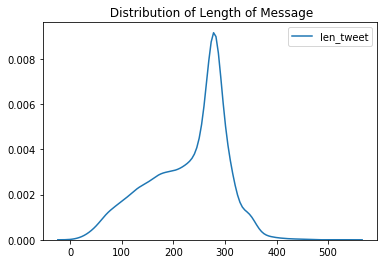

In [36]:
sns.kdeplot(df['len_tweet']).set_title(" Distribution of Length of Message")

Text(0.5, 1.0, ' Distribution of Retweet')

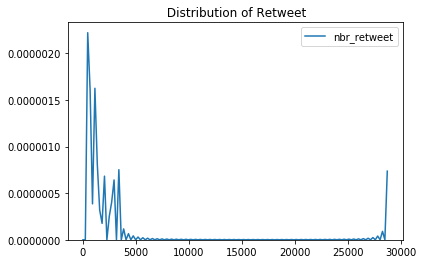

In [37]:
sns.kdeplot(df['nbr_retweet']).set_title(" Distribution of Retweet")

In [38]:
df['nbr_retweet'].describe()

count     8357.000000
mean         8.627378
std        322.851208
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      28741.000000
Name: nbr_retweet, dtype: float64

### After seeing max of nbr_retweet is 28741.0, i went to the csv file to look whose tweet has been retweeted and got to know its bollywood actor Akshay Kumar.

In [39]:
df[df.nbr_retweet==28741]

,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,date,time,cleaned_tweet,len_tweet
572,"Whether it is #PriyankaReddy in Hyderabad, #R...",28741,109240,5676,2019-11-29 18:36:37,2019-11-29,18.0,whether priyankareddi hyderabad roja tamil nad...,283


In [40]:
df_=df.iloc[572:573]

Text(0.5, 1.0, ' Distribution of Retweet')

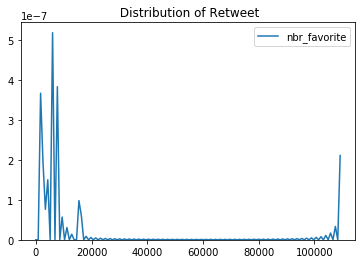

In [41]:
sns.kdeplot(df['nbr_favorite']).set_title(" Distribution of Retweet")

In [42]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### On 30-11-2019 the tweets has been maximum because on 30-11-2019, 6 known Rape cases happened, among which Priyanka Reddy Rape case was more in news

In [43]:
df['date'].value_counts()

2019-11-30    3846
2019-11-29    3404
2019-12-01     568
2019-12-02     488
2019-12-03      43
2019-11-28       8
Name: date, dtype: int64

In [44]:
df_=df.copy()

In [45]:
df_.sort_values(["time"], axis=0, ascending=True, inplace=True) 

### From the graph below: There is an important insight which is coming out regarding when people generally have tweeted:
### It has been noticed from the graph that at night 10PM-12AM, people have tweeted the most, because people are mostly free from office during nights and during 2AM-7AM, the tweets have been less because they sleep during that time.

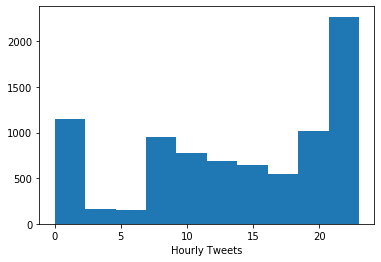

In [46]:
plt.xlabel('Hourly Tweets')
plt.hist(df_['time'])
plt.show()

In [47]:
tags=[]
def Hashtags(text):
    hash_= re.findall('(# [A-Z]*[a-z]*|#[A-Z]*[a-z]+)',text)
    tags.append(hash_)
    return ' '.join(hash_)
    

### Regex function to separate the hash_tags from the tweet and later in a column named "hash_tags" its been saved

In [48]:
df['hash_tags']=df['text'].apply(lambda x:Hashtags(x))

In [49]:
df['len_hash_tag']=df['hash_tags'].apply(lambda x:len(x))

In [50]:
df.head()

,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,date,time,cleaned_tweet,len_tweet,hash_tags,len_hash_tag
0,What's your take on #RapistRahul talking abou...,1,3,0,2019-11-28 12:09:01,2019-11-28,12.0,what take rapistrahul talk women safeti sukany...,228,#Rapist #Sukanya #Nirbhaya,26
1,2012 #Delhi gang-rape case: On the plea of #N...,0,0,0,2019-11-28 12:24:23,2019-11-28,12.0,2012 delhi gangrap case plea nirbhaya parent s...,243,#Delhi #Nirbhaya,16
2,Better to shift this case to Pakistan SC. #Jus...,0,0,0,2019-11-28 12:25:18,2019-11-28,12.0,better shift case pakistan sc justicekhosa bet...,89,#Justice #Nirbhaya,18
3,# Nirbhaya #Gangrape Case : Court has sought...,0,0,0,2019-11-28 12:44:10,2019-11-28,12.0,nirbhaya gangrap case court sought statu repo...,250,# Nirbhaya #Gangrape,20
4,# Nirbhaya #Gangrape : Court has sought statu...,1,0,0,2019-11-28 12:49:07,2019-11-28,12.0,nirbhaya gangrap court sought statu report ti...,237,# Nirbhaya #Gangrape,20


In [51]:
temp=' '.join(str(' '.join(str(x.lower().replace(' ',''))for x in v)) for v in tags)
List_tags=temp.split(' ')


In [52]:
List_tags[13]

'#tiharjail'

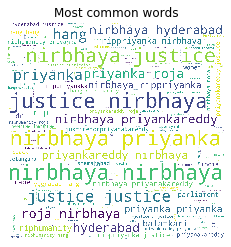

In [53]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')), background_color='white')
wordcloud = wordcloud.generate(' '.join(List_tags))
plt.imshow(wordcloud)
plt.title("Most common words")
plt.axis('off')
plt.show()

### From the above wordcloud , it has been noticed that Priyanka,Justice,PriyankaReddy,hang are some of the hash_tags which are popping out more, which has a meaning, as PriyankaReddy word and justice to the rapist and also to hang the rapist, can be the demand of the people who tweeted.

In [54]:
dic={'tags':List_tags}
data=pd.DataFrame.from_dict(dic)

In [55]:
data['tags'].value_counts()

#nirbhaya                            8524
#justice                             4025
#priyanka                            3533
#hyderabad                           1241
#hang                                1170
#priyankareddy                        946
#roja                                 881
#rippriyanka                          681
#riphumanity                          587
#priyanakareddy                       406
#balatkari                            317
#rip                                  272
#dr                                   197
#rape                                 176
#parliament                           173
#shamshabad                           152
#justicefor                           142
#black                                132
#women                                131
#india                                129
#rippriyanaka                         123
#friday                               123
#justiceforpriyanakareddy             122
#asifa                            

In [56]:
#!pip install vaderSentiment

In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments 
# of the sentence. 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
       # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        return "Positive" 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return "Negative" 
  
    else : 
        return "Neutral" 
  

In [58]:
df['Sentiment']=df['text'].apply(lambda x:sentiment_scores(x))

### Sentiments to all the tweets have been stored in the column named "Sentiment"

In [59]:
df.head()

,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,date,time,cleaned_tweet,len_tweet,hash_tags,len_hash_tag,Sentiment
0,What's your take on #RapistRahul talking abou...,1,3,0,2019-11-28 12:09:01,2019-11-28,12.0,what take rapistrahul talk women safeti sukany...,228,#Rapist #Sukanya #Nirbhaya,26,Positive
1,2012 #Delhi gang-rape case: On the plea of #N...,0,0,0,2019-11-28 12:24:23,2019-11-28,12.0,2012 delhi gangrap case plea nirbhaya parent s...,243,#Delhi #Nirbhaya,16,Positive
2,Better to shift this case to Pakistan SC. #Jus...,0,0,0,2019-11-28 12:25:18,2019-11-28,12.0,better shift case pakistan sc justicekhosa bet...,89,#Justice #Nirbhaya,18,Positive
3,# Nirbhaya #Gangrape Case : Court has sought...,0,0,0,2019-11-28 12:44:10,2019-11-28,12.0,nirbhaya gangrap case court sought statu repo...,250,# Nirbhaya #Gangrape,20,Neutral
4,# Nirbhaya #Gangrape : Court has sought statu...,1,0,0,2019-11-28 12:49:07,2019-11-28,12.0,nirbhaya gangrap court sought statu report ti...,237,# Nirbhaya #Gangrape,20,Neutral


In [60]:
df.tail()

,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,date,time,cleaned_tweet,len_tweet,hash_tags,len_hash_tag,Sentiment
8352,"Yes,public is no one to punish and we don’t wa...",0,0,0,2019-12-03 02:49:55,2019-12-03,2.0,yespubl one punish don’t want procreat new can...,281,#Nirbhaya #Kathua,17,Negative
8353,Waiting for @ArvindKejriwal to offer either g...,0,0,0,2019-12-03 03:07:59,2019-12-03,3.0,wait arvindkejriw offer either govt job sew ma...,171,#priyanakareddy #Nirbhaya,25,Negative
8354,Let Sanghis & @BJP support or denounce rapists...,1,0,0,2019-12-03 04:08:50,2019-12-03,4.0,let sanghi bjp support denounc rapist basi rel...,347,#We #Hang #India #Rapists #Nirbhaya #Asifa #un...,65,Negative
8355,The said MP has been in Parliament since 2004....,0,0,0,2019-12-03 04:42:52,2019-12-03,4.0,said mp parliament sinc 2004 even nirbhaya una...,176,#Nirbhaya,9,Negative
8356,@ BJP4India gas highest number of MPs and MLA...,0,0,0,2019-12-03 05:04:42,2019-12-03,5.0,bjp4india ga highest number mp mla crime woma...,261,#Woman #Stop #Woman #Nirbhaya,29,Positive


In [61]:
positive_reviews=df.loc[df['Sentiment']=='Positive','cleaned_tweet'].tolist()
negative_reviews=df.loc[df['Sentiment']=='Negative','cleaned_tweet'].tolist()
neutral_reviews=df.loc[df['Sentiment']=='Neutral','cleaned_tweet'].tolist()

### Here is an important insight which is coming out, i.e., as i have scrapped for #Nirbhaya which relates to rape case, so negative reviews have the highest number

In [62]:
len(positive_reviews)

1878

In [63]:
len(negative_reviews)

5580

In [64]:
len(neutral_reviews)

899

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter 
import spacy
from IPython.display import clear_output

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer


In [66]:
def commonwords(review,top=30):
    reviews="".join(review)
    tokenised_reviews=reviews.split(" ")
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(top)

In [67]:
top_30_positive_review_words=commonwords(positive_reviews,30)

In [68]:
top_30_positive_review_words

[('nirbhaya', 1240),
 ('justic', 384),
 ('women', 348),
 ('priyankareddi', 342),
 ('\xa0', 313),
 ('\nnirbhaya', 288),
 ('http', 285),
 ('priyanka', 277),
 ('like', 272),
 ('justiceforroja', 256),
 ('law', 229),
 ('india', 217),
 ('justiceforpriyankareddi', 199),
 ('case', 198),
 ('need', 187),
 ('countri', 153),
 ('pleas', 152),
 ('narendramodi', 152),
 ('want', 144),
 ('dont', 134),
 ('hang', 133),
 ('make', 132),
 ('one', 130),
 ('rape', 126),
 ('get', 125),
 ('safe', 122),
 ('hyderabad', 122),
 ('still', 118),
 ('take', 115),
 ('pmoindia', 115)]

In [69]:
top_30_negative_review_words=commonwords(negative_reviews,30)

In [70]:
top_30_negative_review_words 

[('nirbhaya', 3788),
 ('rape', 2035),
 ('priyankareddi', 1451),
 ('case', 1298),
 ('rapist', 1200),
 ('need', 1185),
 ('law', 1112),
 ('hyderabad', 826),
 ('societi', 816),
 ('\xa0', 791),
 ('roja', 783),
 ('priyanka', 765),
 ('http', 703),
 ('\nnirbhaya', 696),
 ('hang', 637),
 ('women', 633),
 ('india', 628),
 ('justiceforroja', 628),
 ('gangrap', 608),
 ('punish', 564),
 ('justiceforpriyankareddi', 541),
 ('murder', 539),
 ('7', 490),
 ('yr', 448),
 ('death', 446),
 ('moral', 446),
 ('student', 427),
 ('continu', 426),
 ('countri', 425),
 ('crime', 425)]

In [71]:
top_30_neutral_review_words=commonwords(neutral_reviews,30)

In [72]:
top_30_neutral_review_words

[('nirbhaya', 596),
 ('\xa0', 244),
 ('http', 223),
 ('priyankareddi', 179),
 ('\nnirbhaya', 156),
 ('justiceforroja', 147),
 ('priyanka', 120),
 ('justiceforpriyankareddi', 104),
 ('hyderabad', 81),
 ('case', 75),
 ('…', 72),
 ('\njusticeforroja', 63),
 ('india', 62),
 ('hang', 60),
 ('narendramodi', 54),
 ('need', 52),
 ('law', 52),
 ('hangrapist', 51),
 ('roja', 45),
 ('riphuman', 45),
 ('pmoindia', 43),
 ('\n', 42),
 ('happen', 41),
 ('dont', 41),
 ('\npriyankareddi', 41),
 ('chang', 39),
 ('monster', 37),
 ('time', 37),
 ('one', 37),
 ('women', 36)]

In [73]:
neg_words=[val[0] for val in top_30_negative_review_words]
pos_words=[val[0] for val in top_30_positive_review_words]
neu_words=[val[0] for val in top_30_neutral_review_words]
set(neg_words) - set(pos_words)

{'7',
 'continu',
 'crime',
 'death',
 'gangrap',
 'moral',
 'murder',
 'punish',
 'rapist',
 'roja',
 'societi',
 'student',
 'yr'}

In [74]:
set(pos_words) - set(neg_words)

{'dont',
 'get',
 'justic',
 'like',
 'make',
 'narendramodi',
 'one',
 'pleas',
 'pmoindia',
 'safe',
 'still',
 'take',
 'want'}

In [75]:
def plotCommonWords(reviews,top=50,title="Positive Review",color="blue",axis=None):
    top_words=commonwords(reviews,top=top)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(top))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(top))


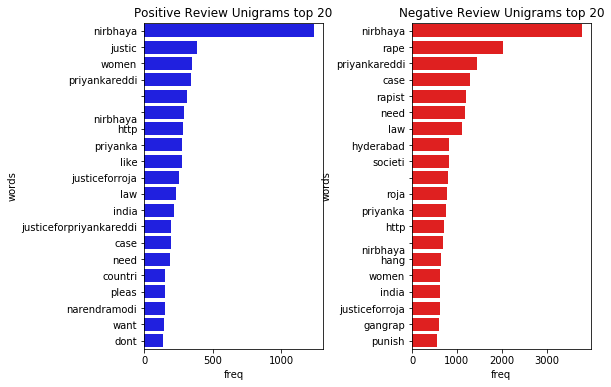

In [76]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

In [77]:
def generateNGram(text,n=2):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [78]:
positive_reviews_bigrams=[" ".join(generateNGram(review)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review)) for review in negative_reviews]

In [79]:
top_20_positive_bigrams=commonwords(positive_reviews_bigrams,top=20)
top_20_positive_bigrams

[('nirbhaya_priyankareddi', 78),
 ('nirbhaya_case', 70),
 ('justiceforroja_nirbhaya', 68),
 ('like_nirbhaya', 51),
 ('women_safeti', 44),
 ('nirbhaya_priyanka', 44),
 ('nirbhaya_justiceforroja', 44),
 ('priyanka_reddi', 41),
 ('priyankareddi_nirbhaya', 40),
 ('nirbhaya_hyderabad', 35),
 ('nirbhaya_justiceforpriyankareddi', 32),
 ('strict_law', 31),
 ('priyanka_nirbhaya', 31),
 ('7_year', 30),
 ('\xa0_…', 29),
 ('want_justic', 29),
 ('burnt_aliv', 28),
 ('justiceforpriyankareddi_nirbhaya', 28),
 ('strong_law', 27),
 ('still_aliv', 27)]

In [80]:
top_20_negative_bigrams=commonwords(negative_reviews_bigrams,top=20)

In [81]:
top_20_negative_bigrams

[('nirbhaya_case', 571),
 ('law_student', 389),
 ('7_yr', 386),
 ('gutwrench_nirbhaya', 382),
 ('student_gangrap', 381),
 ('lose_societi', 380),
 ('case_moral', 380),
 ('seem_lose', 378),
 ('priyankareddi_hyderabad', 377),
 ('tamil_nadu', 375),
 ('need_stricter', 375),
 ('moral_fabric', 373),
 ('yr_gutwrench', 368),
 ('fabric_continu', 368),
 ('nadu_law', 365),
 ('societi_7', 365),
 ('gangrap_ranchiw', 364),
 ('ranchiw_seem', 364),
 ('hyderabad_roja', 362),
 ('roja_tamil', 359)]

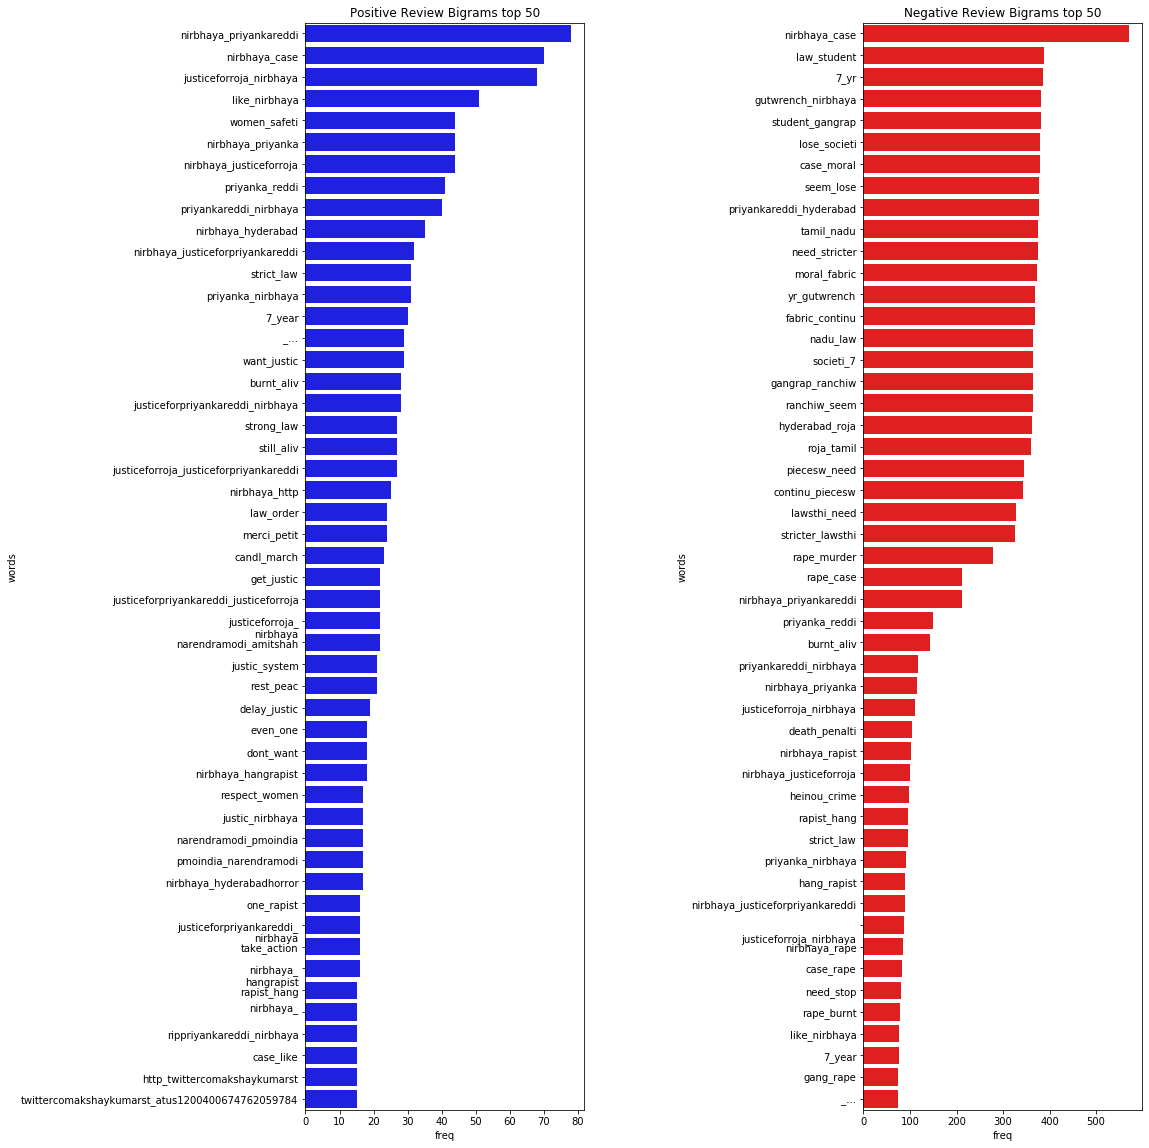

In [82]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotCommonWords(positive_reviews_bigrams,50,"Positive Review Bigrams",axis=ax[0])

plotCommonWords(negative_reviews_bigrams,50,"Negative Review Bigrams",color="red",axis=ax[1])

In [83]:
def TriGram(text,n=3):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [84]:
positive_reviews_trigrams=[" ".join(TriGram(review)) for review in positive_reviews]
negative_reviews_trigrams=[" ".join(TriGram(review)) for review in negative_reviews]

In [85]:
top_20_positive_trigrams=commonwords(positive_reviews_trigrams,top=20)
top_20_positive_trigrams

[('even_one_rapist', 15),
 ('http_twittercomakshaykumarst_atus1200400674762059784', 15),
 ('twittercomakshaykumarst_atus1200400674762059784_\xa0', 15),
 ('case_like_nirbhaya', 11),
 ('justiceforroja_justiceforpriyankareddi_nirbhaya', 10),
 ('one_rapist_hang', 10),
 ('http_twittercomanjanaomkashya_pstatus1200433421924872203', 9),
 ('twittercomanjanaomkashya_pstatus1200433421924872203_\xa0', 9),
 ('\nhyderabadhorror_\nnirbhaya_\nhangrapist', 9),
 ('thing_lack_justic', 8),
 ('lack_justic_system', 8),
 ('priyanka_even_one', 8),
 ('justiceforroja_nirbhaya_justiceforpriyankareddi', 8),
 ('dr_priyanka_reddi', 8),
 ('fast_track_court', 8),
 ('nirbhaya_case_emerg', 7),
 ('case_emerg_hyderabad', 7),
 ('emerg_hyderabad_\nthe', 7),
 ('hyderabad_\nthe_real', 7),
 ('\nthe_real_issu', 7)]

In [86]:
top_20_negative_trigrams=commonwords(negative_reviews_trigrams,top=20)
top_20_negative_trigrams

[('gutwrench_nirbhaya_case', 380),
 ('nirbhaya_case_moral', 380),
 ('law_student_gangrap', 377),
 ('seem_lose_societi', 374),
 ('case_moral_fabric', 368),
 ('yr_gutwrench_nirbhaya', 367),
 ('moral_fabric_continu', 367),
 ('tamil_nadu_law', 364),
 ('nadu_law_student', 364),
 ('gangrap_ranchiw_seem', 363),
 ('7_yr_gutwrench', 363),
 ('student_gangrap_ranchiw', 362),
 ('ranchiw_seem_lose', 360),
 ('lose_societi_7', 360),
 ('societi_7_yr', 359),
 ('roja_tamil_nadu', 358),
 ('priyankareddi_hyderabad_roja', 355),
 ('hyderabad_roja_tamil', 352),
 ('fabric_continu_piecesw', 343),
 ('continu_piecesw_need', 343)]

In [87]:
df.columns

Index(['text', 'nbr_retweet', 'nbr_favorite', 'nbr_reply', 'datetime', 'date',
       'time', 'cleaned_tweet', 'len_tweet', 'hash_tags', 'len_hash_tag',
       'Sentiment'],
      dtype='object')

In [97]:
df['Sentiment'].value_counts()

Negative    5580
Positive    1878
Neutral      899
Name: Sentiment, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8357 entries, 0 to 8356
Data columns (total 12 columns):
text             8357 non-null object
nbr_retweet      8357 non-null int64
nbr_favorite     8357 non-null int64
nbr_reply        8357 non-null int64
datetime         8357 non-null object
date             8357 non-null object
time             8357 non-null float64
cleaned_tweet    8357 non-null object
len_tweet        8357 non-null int64
hash_tags        8357 non-null object
len_hash_tag     8357 non-null int64
Sentiment        8357 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 783.6+ KB


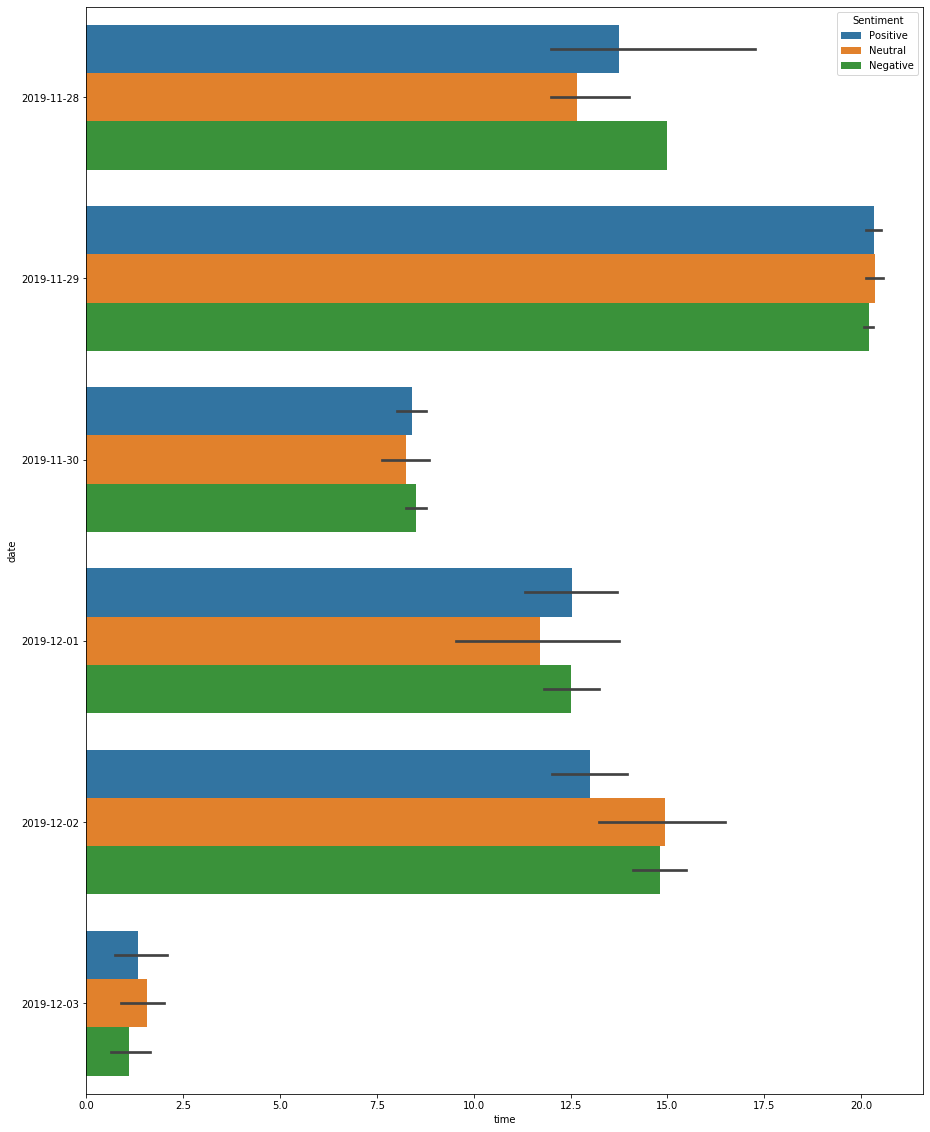

In [93]:
sns.barplot(x='time',y='date',hue='Sentiment',data=df)

In [ ]:
#!pip install gensim

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['cleaned_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [121]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics=5
model=LatentDirichletAllocation(n_components=number_of_topics,random_state=0)

In [122]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [123]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

### Other that http and ... which doesnt make sense, so priyankareddi is the word having highest weight Topic 0 words 
### In Topic 1 words case and rape are the two top words having highest weights 
### In topic 2 words need and law are the two top words
### In topic 3 words rape and justiceforroja have two top weights
### In topic 4 words law and priyankareddi ahve two top weights

In [124]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,http,1183.7,case,734.9,need,872.7,rape,1080.6,law,858.2
1,…,1152.8,rape,488.9,law,494.5,justiceforroja,657.8,priyankareddi,823.3
2,priyankareddi,507.5,year,418.7,yr,484.2,priyanka,573.5,women,746.8
3,priyanka,468.4,india,407.4,continu,458.2,priyankareddi,567.3,justiceforroja,727.5
4,justiceforroja,379.5,justic,407.3,societi,451.9,justiceforpriyankareddi,536.2,narendramodi,713.4
5,hyderabad,305.1,priyankareddi,380.0,case,448.6,hyderabad,513.9,priyanka,651.6
6,justiceforpriyankareddi,275.3,still,321.7,priyankareddi,440.9,rapist,498.0,rapist,633.9
7,rapist,198.0,court,243.5,seem,439.2,hangrapist,395.4,rape,605.6
8,shame,190.3,get,218.1,7,435.5,murder,379.3,justiceforpriyankareddi,598.8
9,sister,169.9,rapist,217.9,stricter,434.2,4,363.3,need,548.8


# The end